In [33]:
import tweepy
import os
from dotenv import load_dotenv
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [34]:
# Declare global variables and constants
TWEET_COUNT = 1000
api = ""
sentiment_analysis = {}

def refresh_sentiment_analysis():
    global sentiment_analysis
    sentiment_analysis["positive"] = 0
    sentiment_analysis["negative"] = 0
    sentiment_analysis["neutral"] = 0
    sentiment_analysis["polarity"] = 0

def refine_search_query(query):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", query.strip()).split())

In [35]:
#loads environment file and set up tweepy auth
def initialize():
    load_dotenv()
    
    auth = tweepy.OAuthHandler(os.getenv("CONSUMER_KEY"), os.getenv("CONSUMER_SECRET"))
    auth.set_access_token(os.getenv("ACCESS_TOKEN"), os.getenv("ACCESS_TOKEN_SECRET"))
    
    global api

    api = tweepy.API(auth)
    

In [36]:
def get_tweets(search_query, tweet_count):
    return tweepy.Cursor(api.search, 
                               q=search_query,
                              result_type='recent',
                              lang='en',
                              ).items(tweet_count)

In [37]:
def get_percentage(part,whole):
    return format(100* float(part)/float(whole), '.2f')
def clean_tweets(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

In [38]:
def analyze_tweets(search_query):
    tweets = get_tweets(search_query, TWEET_COUNT)
    
    for tweet in tweets:
        analysis = TextBlob(clean_tweets(tweet.text))
        sentiment_analysis["polarity"] += analysis.sentiment.polarity
        
        if (analysis.sentiment.polarity == 0):
            sentiment_analysis["neutral"] += 1
        elif (analysis.sentiment.polarity < 0):
            sentiment_analysis["negative"] += 1
        elif (analysis.sentiment.polarity > 0):
            sentiment_analysis["positive"] += 1

In [39]:
def generate_report():
    sentiment_analysis["neutral"] = get_percentage(sentiment_analysis["neutral"], TWEET_COUNT)
    sentiment_analysis["negative"] = get_percentage(sentiment_analysis["negative"], TWEET_COUNT)
    sentiment_analysis["positive"] = get_percentage(sentiment_analysis["positive"], TWEET_COUNT)
    sentiment_analysis["polarity"] = sentiment_analysis["polarity"]/ TWEET_COUNT

In [40]:
def plot_chart(search_query):
    labels = ['Positive [' + str(sentiment_analysis["positive"]) + '%]', 'Neutral [' + str(sentiment_analysis["neutral"]) + '%]', 'Negative [' + str(sentiment_analysis["negative"]) + '%]']
    sizes = [sentiment_analysis["positive"], sentiment_analysis["neutral"], sentiment_analysis["negative"]]
    colors = ['yellowgreen', 'gold', 'red']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('People reaction on ' + str(search_query)+ ' by analyzing ' + str(TWEET_COUNT) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


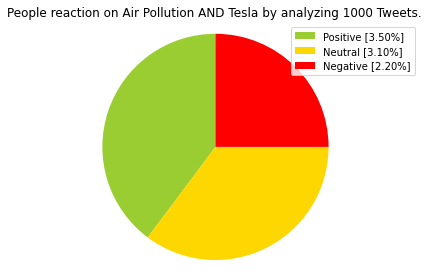

In [41]:
if __name__ == "__main__":
    initialize()
    refresh_sentiment_analysis()
    search_query = refine_search_query("Air Pollution AND Tesla")
    analyze_tweets(search_query)
    generate_report()
    plot_chart(search_query)


#### Todos

- [ ] Iterate over a list of companies
- [ ] Construct a base query
- [ ] Perform sentiment analysis

In [ ]:
#### Factors to consider
- [ ] 